In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json

from dqo.estimator import evaluate as evl

from dqo.estimator.gerelt import v2 as gerelt2, v15 as gerelt15, v17 as gerelt17,v18 as gerelt18,v19 as gerelt19
from dqo.estimator.greq import v3 as greq3, v1 as greq1
from dqo.estimator.relcnn import v1 as relcnn
from dqo.estimator.treelstm import v2 as treelstm
from dqo.estimator.others.neo import v1 as neo
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  del sys.path[0]


In [2]:
import importlib 
importlib.reload(evl)

<module 'dqo.estimator.evaluate' from '/Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/evaluate.py'>

# Trained on tpch

In [3]:
summary_df, results_df = evl.compare_versions(versions=[gerelt15], trained_on=['all'], test_on=['tpch', 'tpcd', 'tpcds', 'imdb'])

2021-06-18 18:45:12,648 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/optimized/runtimes/test.csv [1/2]
2021-06-18 18:45:12,701 | dqo.datasets | INFO | Loaded 2273 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/optimized/runtimes/test.csv [1/2]
2021-06-18 18:45:12,725 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/test.csv [1/2]
2021-06-18 18:45:12,782 | dqo.datasets | INFO | Loaded 2364 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcd/execution/optimized/runtimes/test.csv [1/2]
2021-06-18 18:45:12,804 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpcds/execution/optimized/runtimes/test.csv [1/2]
2021-06-18 18:45:12,848 | dqo.datasets | INFO | Loaded 1468 rows from /Users

test_ds: tpch zero rule accuracy is: 0.08888888888888889
test_ds: tpcd zero rule accuracy is: 0.09329446064139942
test_ds: tpcds zero rule accuracy is: 0.11949685534591195


2021-06-18 18:45:12,937 | dqo.datasets | INFO | Loaded 2752 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/test.csv [1/2]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


test_ds: imdb zero rule accuracy is: 0.09580838323353294


  1%|▏         | 4/270 [00:01<01:42,  2.59it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 270/270 [01:00<00:00,  4.45it/s]


df: tpch, v: dqo.estimator.gerelt.v15, cp: /Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v15/logs/all/version_1/checkpoints/epoch=71-step=5446871.ckpt :: accuracy: 0.5851851851851851, mae: 6.783824862489106, f1: 0.5862297608343819


100%|██████████| 343/343 [01:35<00:00,  3.60it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


df: tpcd, v: dqo.estimator.gerelt.v15, cp: /Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v15/logs/all/version_1/checkpoints/epoch=71-step=5446871.ckpt :: accuracy: 0.16326530612244897, mae: 23.697218825279233, f1: 0.10617152124246229


100%|██████████| 636/636 [04:15<00:00,  2.49it/s]


df: tpcds, v: dqo.estimator.gerelt.v15, cp: /Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v15/logs/all/version_1/checkpoints/epoch=71-step=5446871.ckpt :: accuracy: 0.5927672955974843, mae: 8.249219491993207, f1: 0.5412748511238515


100%|██████████| 167/167 [00:59<00:00,  2.82it/s]

df: imdb, v: dqo.estimator.gerelt.v15, cp: /Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v15/logs/all/version_1/checkpoints/epoch=71-step=5446871.ckpt :: accuracy: 0.4491017964071856, mae: 10.517166039335981, f1: 0.40447732534487146


In [76]:
summary_df.to_csv('temp_results.csv', index=False)

In [80]:
summary_df.groupby('name').aggregate('mean')

,accuracy,balanced accuracy,recall,f1 weighted,mae
name,,,,,
v15.gerelt,0.443460,0.358626,0.410551,0.427503,12.513893
v18.gerelt,0.325335,0.227655,0.290528,0.295521,16.372147
v19.gerelt,0.406798,0.318342,0.373645,0.388703,12.769079
zero_rule.,0.099372,0.000000,0.000000,0.000000,0.000000


In [64]:
def plot_column(df, column):
    df['name'] = df['arch'] + '.' + df['version']
    trained_on = df.trained_on.unique()
    fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15,7))
    for idx, trainset in enumerate(trained_on):
        query = f'trained_on == "{trainset}"'
        axes[idx].set_title(query)
        
        df.query(query).pivot(index='tested_on', columns='name', values=column).plot.bar(ax=axes[idx]).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

    fig.tight_layout()
    plt.show()
    

---

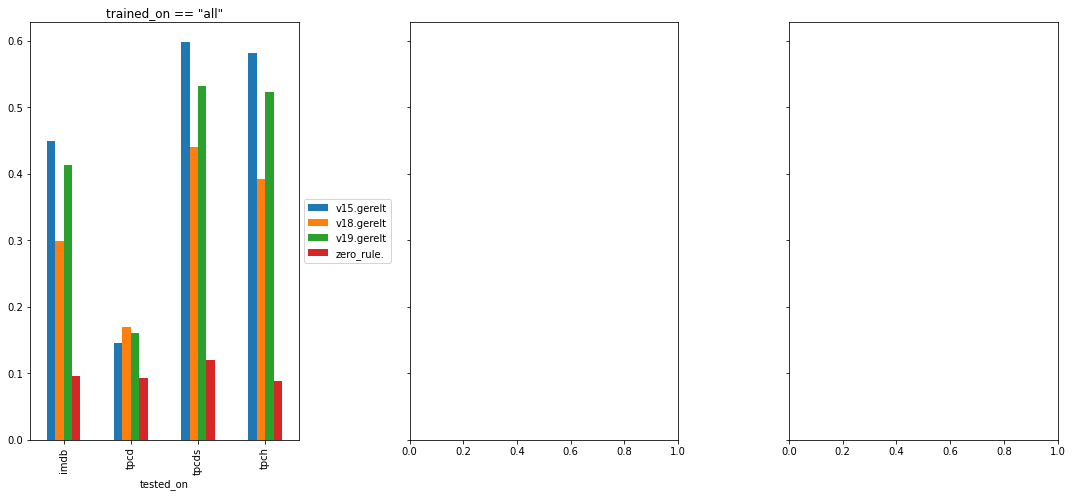

In [79]:
plot_column(summary_df, 'accuracy')

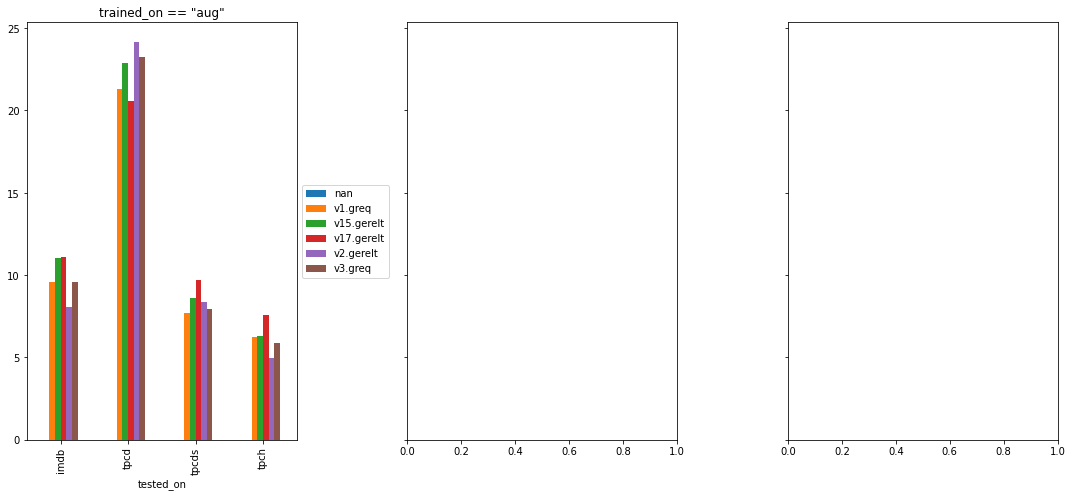

In [6]:
plot_column(summary_df, 'mae')

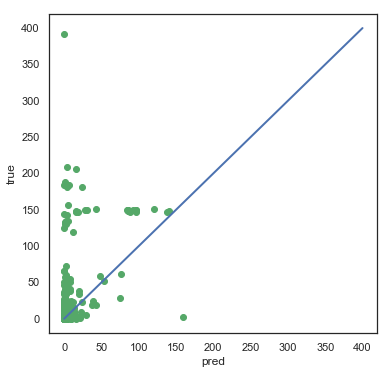

In [68]:
grid = sns.JointGrid(results_df['aug_dqo.estimator.greq.v1_tpcd']['pred'], results_df['aug_dqo.estimator.greq.v1_tpcd']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)



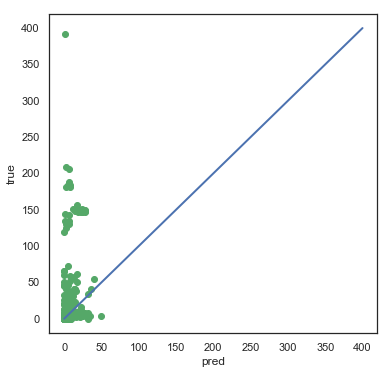

In [70]:
grid = sns.JointGrid(results_df['aug_dqo.estimator.gerelt.v2_tpcd']['pred'], results_df['aug_dqo.estimator.gerelt.v2_tpcd']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)



In [ ]:
r = evl.inspect_version(gerelt1, 'aug', ['tpch', 'imdb', 'tpcds', 'tpcd'])

<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

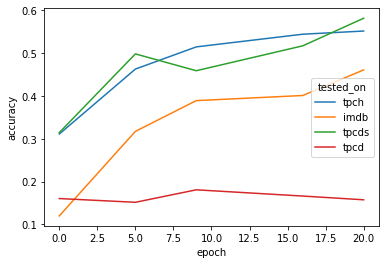

In [3]:
sns.lineplot(data=r[0],x='epoch',y='accuracy',hue='tested_on')

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: UserW

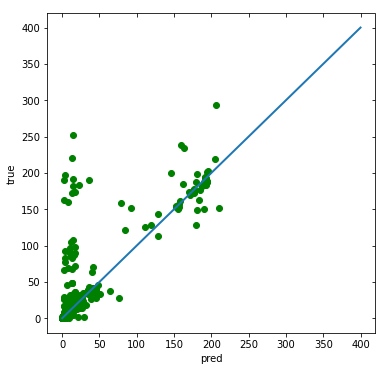

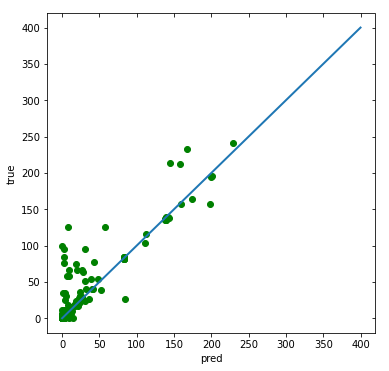

In [12]:
grid = sns.JointGrid(r[1]['aug_dqo.estimator.gerelt.v17_tpcds']['pred'], r[1]['aug_dqo.estimator.gerelt.v17_tpcds']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)

grid = sns.JointGrid(r[1]['aug_dqo.estimator.gerelt.v17_tpch']['pred'], r[1]['aug_dqo.estimator.gerelt.v17_tpch']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)

plt.tight_layout()

# Compare Training Sets

In [ ]:
r = evl.compare_runs(gerelt15, ['tpch', 'imdb', 'tpcds', 'tpcd'])

In [97]:
r = r[0].query('trained_on != "adadelta"').copy(), r[1]

In [98]:
r[0].to_csv('v15_multi_training_set_bucketed2.csv', index=False)

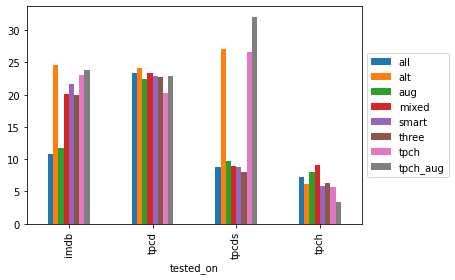

In [107]:
def plot_column2(df, column):
    df['name'] = df['arch'] + '.' + df['version']
    trained_on = df.trained_on.unique()
    
    df.pivot(index='tested_on', columns='trained_on', values=column).plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

    plt.show()
    
plot_column2(r[0], 'mae')

In [106]:
r[0].groupby('trained_on').aggregate('mean')

,epoch,accuracy,balanced accuracy,recall,f1 weighted,mae
trained_on,,,,,,
all,79,0.443460,0.358626,0.410551,0.427503,12.513893
alt,75,0.257380,0.176129,0.243308,0.229583,20.478725
aug,9,0.393050,0.308874,0.364974,0.370662,12.968946
mixed,13,0.392857,0.310884,0.366799,0.372002,15.328577
smart,34,0.409343,0.322496,0.377440,0.388152,14.754978
three,111,0.462023,0.374877,0.425477,0.439607,14.234606
tpch,149,0.265428,0.182886,0.249523,0.246191,18.836312
tpch_aug,99,0.283917,0.210192,0.274524,0.265906,20.517943


<AxesSubplot:xlabel='trained_on'>

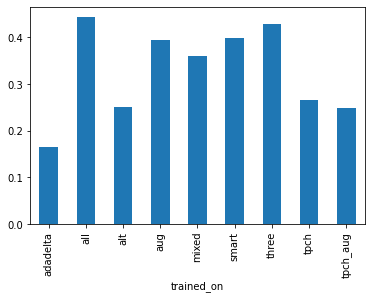

In [54]:
r[0].groupby('trained_on')['accuracy'].aggregate('mean').plot.bar()

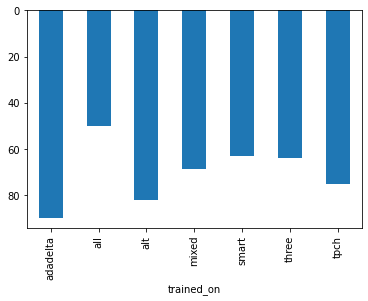

In [20]:
r[0].groupby('trained_on')['mae'].aggregate('sum').plot.bar()
plt.gca().invert_yaxis()

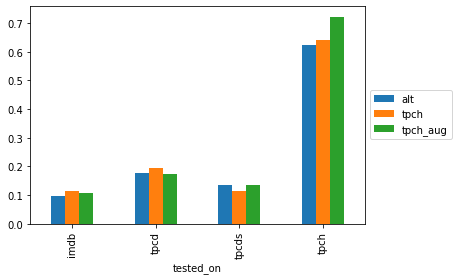

In [112]:
r[0].query('trained_on in ("tpch","alt", "tpch_aug")').pivot(index='tested_on', columns='trained_on', values='accuracy').plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [56]:
r[0].query('trained_on in ("tpch","alt", "tpch_aug") and tested_on in ("tpcds", "tpcd", "imdb")').groupby('trained_on').aggregate('mean')

,epoch,accuracy,balanced accuracy,recall,f1 weighted,mae
trained_on,,,,,,
alt,49,0.121744,0.033553,0.112098,0.086497,25.282730
tpch,149,0.140324,0.044354,0.122049,0.114316,23.248322
tpch_aug,14,0.134779,0.035783,0.110092,0.113545,24.450431


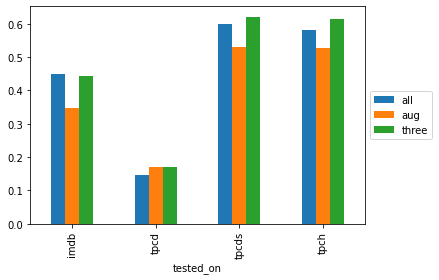

In [89]:
r[0].query('trained_on in ("three","aug","all")').pivot(index='tested_on', columns='trained_on', values='accuracy').plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


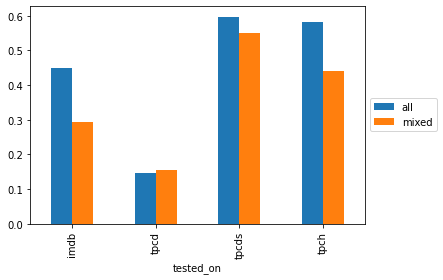

In [32]:
r[0].query('trained_on in ("mixed","all")').pivot(index='tested_on', columns='trained_on', values='accuracy').plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


<AxesSubplot:xlabel='trained_on'>

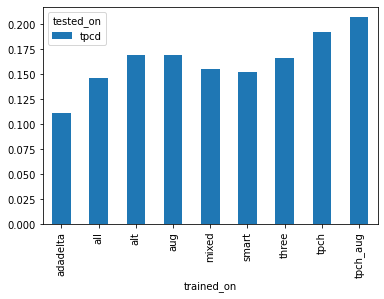

In [58]:
r[0].query('tested_on=="tpcd"').pivot(index='trained_on', columns='tested_on',values='accuracy').plot.bar()

In [ ]:
r2 = evl.compare_runs(gerelt15, ['tpch', 'imdb', 'tpcds', 'tpcd'],bucketed=False)

In [109]:
r2 = r2[0].query('trained_on != "adadelta"').copy() , r2[1]

In [84]:
r2[0].to_csv('v15_multi_training_set2.csv', index=False)

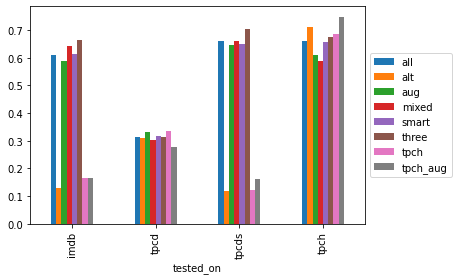

In [110]:
plot_column2(r2[0], 'accuracy')

In [111]:
r2[0].groupby('trained_on').aggregate('mean')

,epoch,accuracy,balanced accuracy,recall,f1 weighted,mae
trained_on,,,,,,
all,79,0.559671,0.357721,0.409791,0.542230,4.347410
alt,75,0.316941,0.185182,0.251596,0.298663,7.023594
aug,9,0.543178,0.307417,0.365133,0.519482,4.140997
mixed,13,0.547670,0.327390,0.383441,0.525950,4.143942
smart,34,0.558176,0.314513,0.371637,0.536401,3.938984
three,111,0.588148,0.354533,0.408322,0.570199,3.801389
tpch,149,0.326440,0.173830,0.242677,0.308490,6.497286
tpch_aug,99,0.336920,0.214536,0.279991,0.320697,8.956112


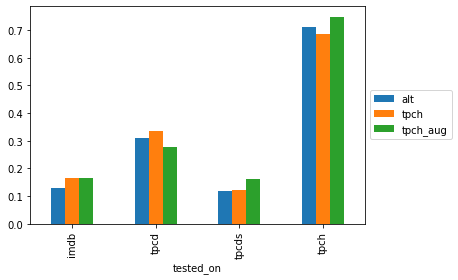

In [87]:
r2[0].query('trained_on in ("tpch","alt", "tpch_aug")').pivot(index='tested_on', columns='trained_on', values='accuracy').plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

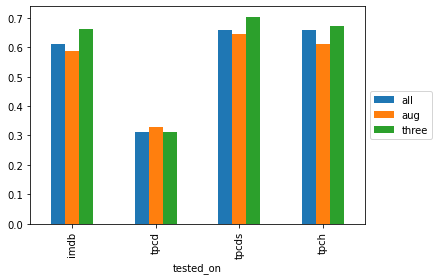

In [90]:
r2[0].query('trained_on in ("three","aug", "all")').pivot(index='tested_on', columns='trained_on', values='accuracy').plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


<AxesSubplot:xlabel='trained_on'>

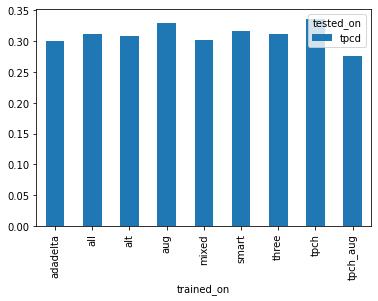

In [91]:
r2[0].query('tested_on=="tpcd"').pivot(index='trained_on', columns='tested_on',values='accuracy').plot.bar()

<AxesSubplot:xlabel='trained_on'>

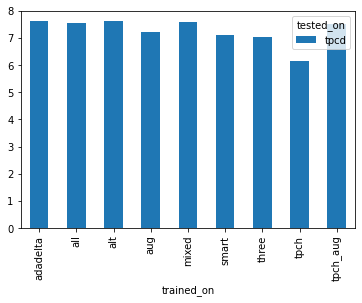

In [92]:
r2[0].query('tested_on=="tpcd"').pivot(index='trained_on', columns='tested_on',values='mae').plot.bar()

In [113]:
r[1].keys()

dict_keys(['adadelta_dqo.estimator.gerelt.v15_tpch', 'adadelta_dqo.estimator.gerelt.v15_imdb', 'adadelta_dqo.estimator.gerelt.v15_tpcds', 'adadelta_dqo.estimator.gerelt.v15_tpcd', 'all_dqo.estimator.gerelt.v15_tpch', 'all_dqo.estimator.gerelt.v15_imdb', 'all_dqo.estimator.gerelt.v15_tpcds', 'all_dqo.estimator.gerelt.v15_tpcd', 'alt_dqo.estimator.gerelt.v15_tpch', 'alt_dqo.estimator.gerelt.v15_imdb', 'alt_dqo.estimator.gerelt.v15_tpcds', 'alt_dqo.estimator.gerelt.v15_tpcd', 'aug_dqo.estimator.gerelt.v15_tpch', 'aug_dqo.estimator.gerelt.v15_imdb', 'aug_dqo.estimator.gerelt.v15_tpcds', 'aug_dqo.estimator.gerelt.v15_tpcd', 'mixed_dqo.estimator.gerelt.v15_tpch', 'mixed_dqo.estimator.gerelt.v15_imdb', 'mixed_dqo.estimator.gerelt.v15_tpcds', 'mixed_dqo.estimator.gerelt.v15_tpcd', 'smart_dqo.estimator.gerelt.v15_tpch', 'smart_dqo.estimator.gerelt.v15_imdb', 'smart_dqo.estimator.gerelt.v15_tpcds', 'smart_dqo.estimator.gerelt.v15_tpcd', 'three_dqo.estimator.gerelt.v15_tpch', 'three_dqo.estimator

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


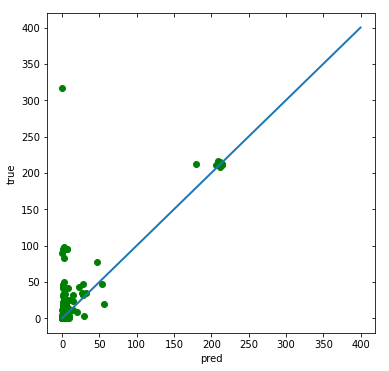

In [115]:
grid = sns.JointGrid(r[1]['all_dqo.estimator.gerelt.v15_imdb']['pred'], r[1]['all_dqo.estimator.gerelt.v15_imdb']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)



/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


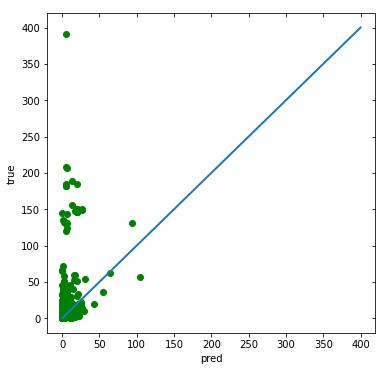

In [116]:
grid = sns.JointGrid(r[1]['all_dqo.estimator.gerelt.v15_tpcd']['pred'], r[1]['all_dqo.estimator.gerelt.v15_tpcd']['true'], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 400], [0, 400], linewidth=2)



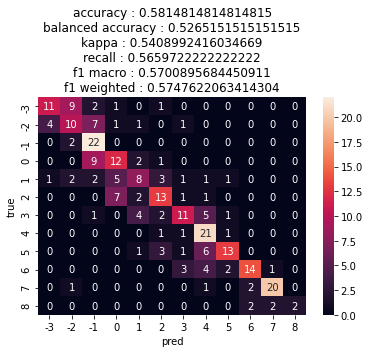

              precision    recall  f1-score   support

          -3       0.69      0.46      0.55        24
          -2       0.42      0.42      0.42        24
          -1       0.51      0.92      0.66        24
           0       0.46      0.50      0.48        24
           1       0.44      0.33      0.38        24
           2       0.54      0.54      0.54        24
           3       0.58      0.46      0.51        24
           4       0.54      0.88      0.67        24
           5       0.72      0.54      0.62        24
           6       0.78      0.58      0.67        24
           7       0.87      0.83      0.85        24
           8       1.00      0.33      0.50         6

    accuracy                           0.58       270
   macro avg       0.63      0.57      0.57       270
weighted avg       0.60      0.58      0.57       270

          abs_err             err_ratio          
             mean     median       mean    median
bucket                           

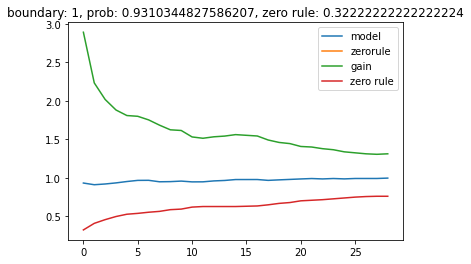

In [122]:
evl.display_results(r[1]['all_dqo.estimator.gerelt.v15_tpch'])

In [120]:
evl.maximize_binary_split(r[1]['all_dqo.estimator.gerelt.v15_tpch'])

(       model  zerorule      gain  zero rule
 0   0.931034       NaN  2.889417   0.322222
 1   0.909091       NaN  2.231405   0.407407
 2   0.918699       NaN  2.016657   0.455556
 3   0.932836       NaN  1.879595   0.496296
 4   0.950704       NaN  1.807677   0.525926
 5   0.965517       NaN  1.797860   0.537037
 6   0.966443       NaN  1.751272   0.551852
 7   0.947368       NaN  1.682825   0.562963
 8   0.949367       NaN  1.622336   0.585185
 9   0.956250       NaN  1.613672   0.592593
 10  0.946108       NaN  1.529635   0.618519
 11  0.946746       NaN  1.512552   0.625926
 12  0.958580       NaN  1.531459   0.625926
 13  0.964497       NaN  1.540912   0.625926
 14  0.976331       NaN  1.559819   0.625926
 15  0.976471       NaN  1.550865   0.629630
 16  0.976608       NaN  1.542013   0.633333
 17  0.965714       NaN  1.489959   0.648148
 18  0.972222       NaN  1.458333   0.666667
 19  0.978142       NaN  1.443160   0.677778
 20  0.984127       NaN  1.405896   0.700000
 21  0.989